# **Prédiction de la fraude en assurance automobile**

Par :  Pierre Arielle - Nicolas Garance - Bonfil Keren - Diallo Mamadou - Monote Karène
### Problématique :

## Introduction
La fraude en assurance automobile constitue un enjeu majeur pour les compagnies d’assurance et pour le bon fonctionnement du marché de l’assurance. Elle correspond à toute tentative intentionnelle d’obtenir une indemnisation injustifiée ou excessive à partir d’une déclaration de sinistre. Dans le domaine de l’assurance automobile, les fraudes peuvent prendre différentes formes, comme la mise en scène d’accidents fictifs, l’exagération des dommages matériels ou corporels, la dissimulation d’informations importantes ou encore la déclaration de faux sinistres.


La fraude représente un coût économique significatif pour les assureurs. Les indemnisations frauduleuses augmentent les dépenses des compagnies d’assurance, ce qui se répercute indirectement sur les assurés sous la forme de primes plus élevées. Par conséquent, la lutte contre la fraude constitue un enjeu à la fois économique, actuariel et social, car une mauvaise détection entraîne une dégradation de la rentabilité des assureurs et une hausse du coût de l’assurance pour l’ensemble des assurés. Une détection efficace de la fraude permet donc d'améliorer la qualité des modèles de tarification et de provisionnement.

C’est pourquoi il est essentiel de mettre en place des modèles prédictifs performants capables d’identifier les comportements frauduleux. L’objectif de ce projet est donc de déterminer le modèle de deep learning le plus efficace pour détecter la fraude en assurance automobile sur une base de données réelle.


## Description du dataset

Le projet utilise la base de données  : [Vehicule Insurance Claim Fraud Detection](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection) disponible sur Kaggle.


In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# @title
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/sample_data/fraud_oracle.csv'
df = pd.read_csv(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


Ce dataset contient des informations sur des sinistres automobiles, incluant :

caractéristiques du véhicule

*   caractéristiques du véhicule (VehiculeCategory, VehiculePrice
*   informations sur le conducteur (Sexe, Age...)
*   détails de l'accident
*   information sur la police d'assurance
*   informations sur la réclamation

Chaque observation correspond à une déclaration de sinistre automobile.

In [ ]:
print(f"Dimensions du dataset : {df.shape[0]} lignes et {df.shape[1]} colonnes\n")


Dimensions du dataset : 15420 lignes et 33 colonnes



La base de données contient environ :


*   15 421 observations
*   33 variables explicatives
*   1 variable cible appelée **FraudFound_P**

Si FraudFound_P = 1 alors il y a frause,
Sinon si FraudFound_P = 0, non fraude.

Il s'agit donc d'un problème de classification binaire.



### Types de variables

Les variables peuvent être regroupées en plusieurs catégories :

1. Variables temporelles
  + Month

  + WeekOfMonth

  + DayOfWeek

  + MonthClaimed

  + WeekOfMonthClaimed

Ces variables décrivent la date du sinistre et de la déclaration.

2. Variables véhicule

+ VehicleCategory

+ VehiclePrice

+ Make

+ AgeOfVehicle

+ NumberOfCars

Ces variables décrivent les caractéristiques du véhicule assuré.


3. Variables conducteur
+ Age

+ Sex

+ MaritalStatus

+ DriverRating

Ces variables décrivent le profil du conducteur

4. Variables accident

+ AccidentArea

+ PoliceReportFiled

+ WitnessPresent

Ces variables décrivent les circonstances de l’accident.

5. Variables assurance et sinistre

+ PolicyType

+ BasePolicy

+ Deductible

+ PastNumberOfClaims

+ Days_Policy_Accident

+ Days_Policy_Claim

Ces variables décrivent les caractéristiques du contrat et du sinistre.


### Déséquilibre des classes

In [ ]:
print("Distribution de la fraude :")
print(df['FraudFound_P'].value_counts(normalize=False))

Distribution de la fraude :
FraudFound_P
0    14497
1      923
Name: count, dtype: int64


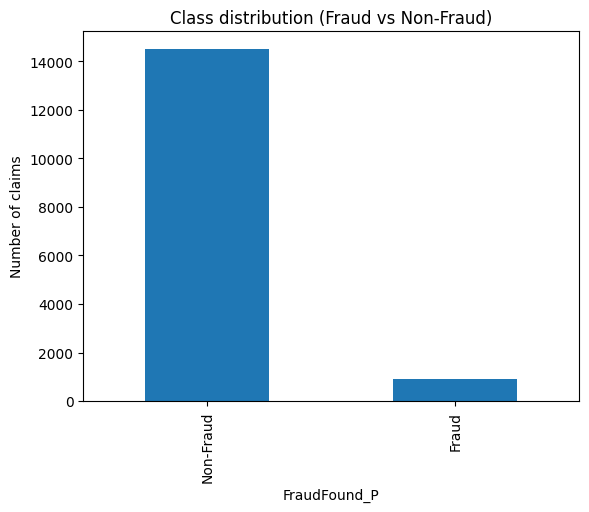

In [ ]:
class_counts = df['FraudFound_P'].value_counts()

# Histogramme
plt.figure()
class_counts.plot(kind='bar')

plt.xlabel("FraudFound_P")
plt.ylabel("Number of claims")
plt.title("Class distribution (Fraud vs Non-Fraud)")

plt.xticks([0,1], ['Non-Fraud', 'Fraud'])

plt.show()

Un aspect important de ce dataset est le déséquilibre des classes :
+ 14 497 sinistres non frauduleux
+ 923 sinistres frauduleux
Soit environ 6% de fraudes seulement.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
df.describe(include="all")

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
count,15420,15420.000000,15420,15420,15420,15420,15420,15420.000000,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420.000000,15420
unique,12,NaN,7,19,2,8,13,NaN,2,4,...,8,9,2,2,2,4,5,5,NaN,3
top,Jan,NaN,Monday,Pontiac,Urban,Monday,Jan,NaN,Male,Married,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,NaN,Collision
freq,1411,NaN,2616,3837,13822,3757,1446,NaN,13000,10625,...,5807,5593,14992,15333,15179,7047,14324,14316,NaN,5962
mean,NaN,2.788586,NaN,NaN,NaN,NaN,NaN,2.693969,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.866472,NaN
std,NaN,1.287585,NaN,NaN,NaN,NaN,NaN,1.259115,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.803313,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN
25%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,NaN
50%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN
75%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

On transforme code d'identification de l'employé enn variable catégorielle.

In [ ]:
df['RepNumber'] = df['RepNumber'].astype('object')

Affichages de quelques graphiques

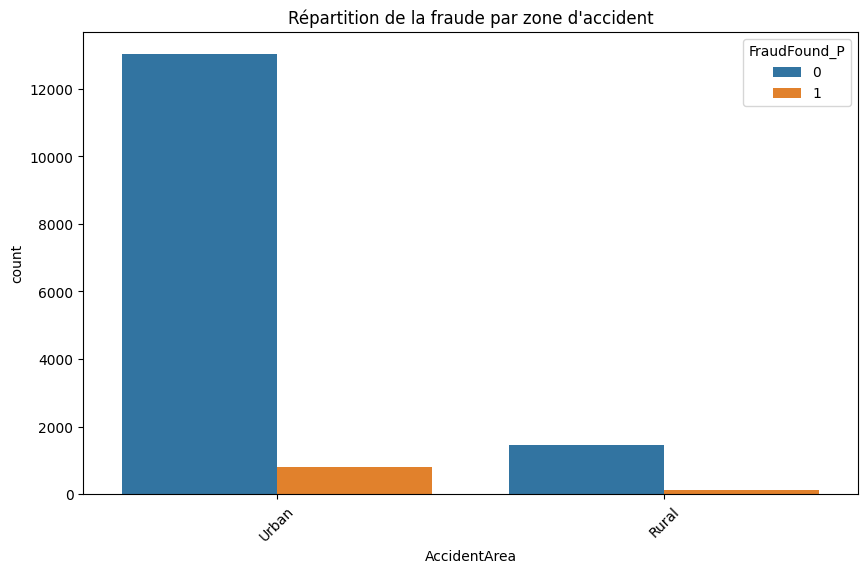

In [ ]:
# 4. Visualisation : Fraude par zone d'accident
plt.figure(figsize=(10,6))
sns.countplot(x='AccidentArea', hue='FraudFound_P', data=df)
plt.title("Répartition de la fraude par zone d'accident")
plt.xticks(rotation=45)
plt.show()

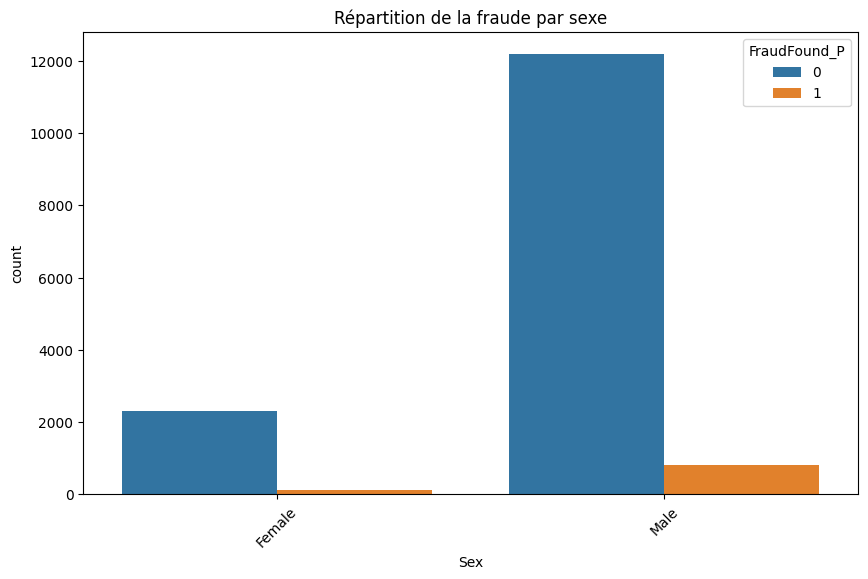

In [ ]:
# 4. Visualisation : Fraude par sexe
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='FraudFound_P', data=df)
plt.title('Répartition de la fraude par sexe')
plt.xticks(rotation=45)
plt.show()

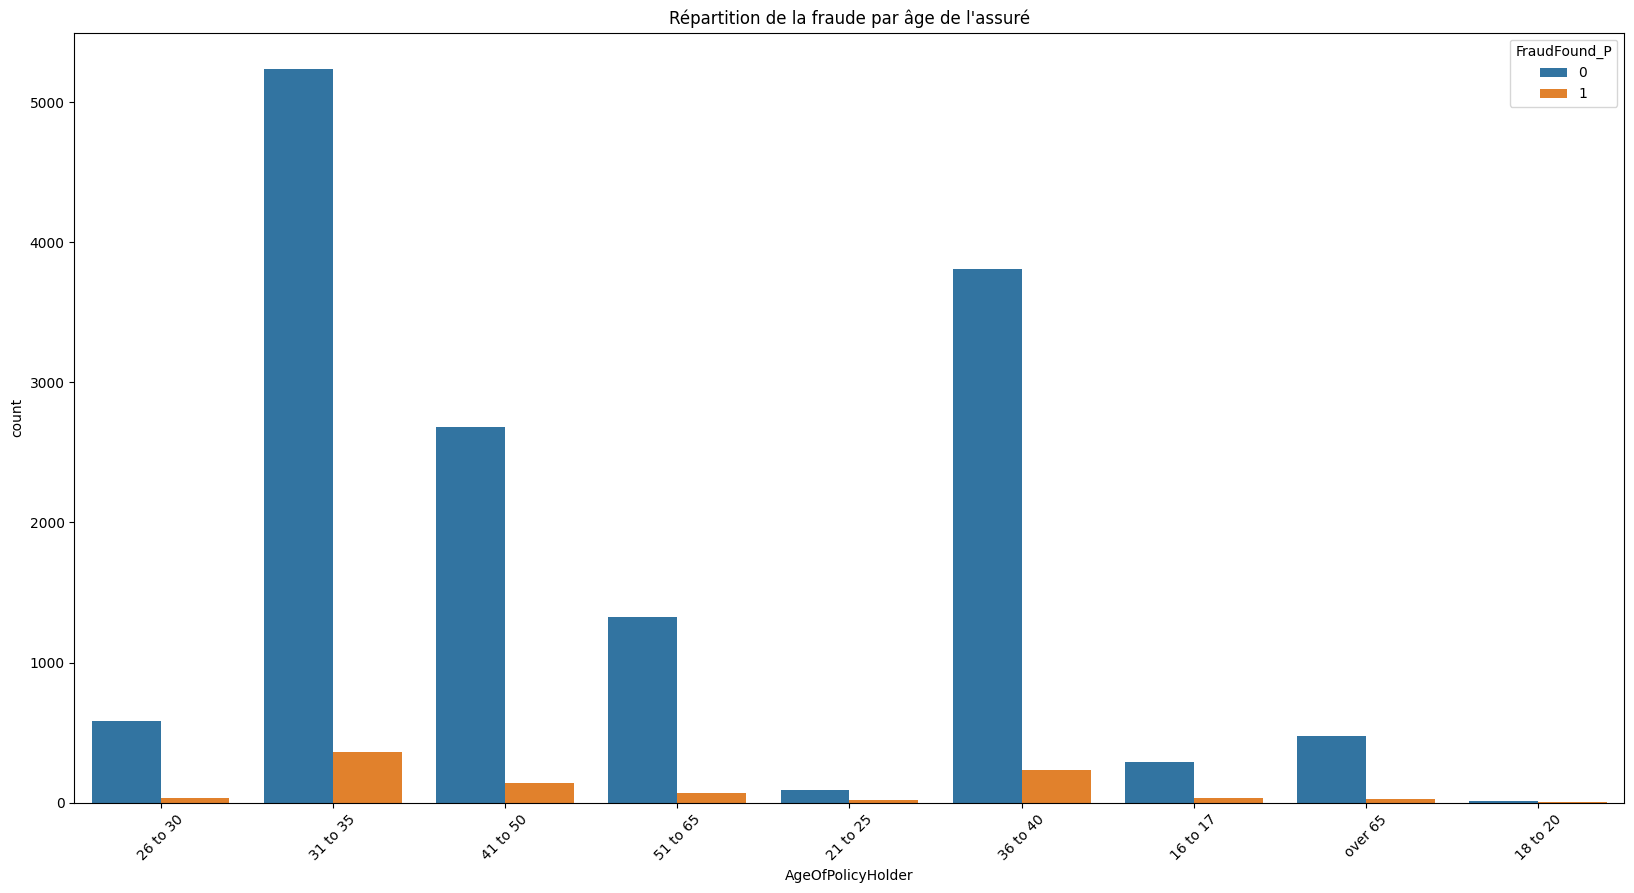

In [ ]:
# 4. Visualisation : Fraude par âge de l'assuré
plt.figure(figsize=(20,10))
sns.countplot(x='AgeOfPolicyHolder', hue='FraudFound_P', data=df)
plt.title("Répartition de la fraude par âge de l'assuré")
plt.xticks(rotation=45)
plt.show()

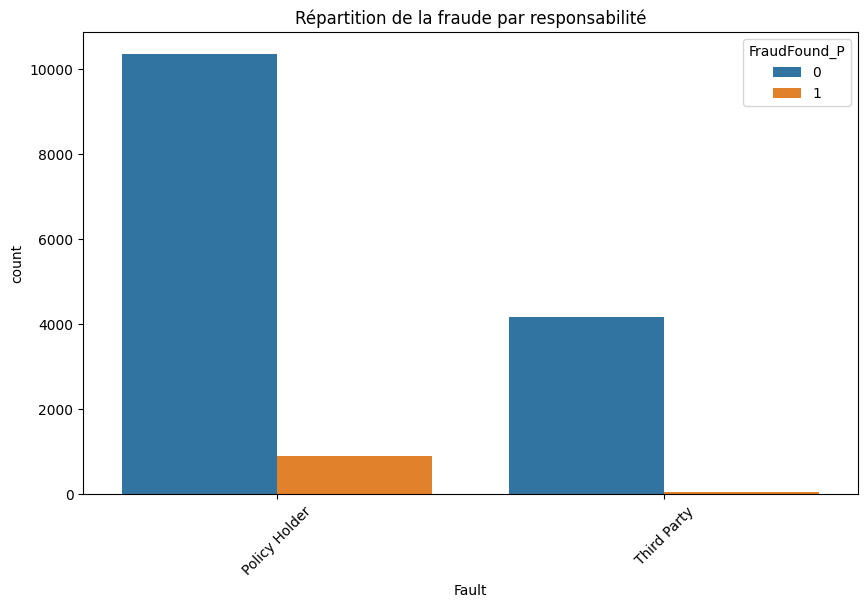

In [ ]:
# 4. Visualisation : Fraude par responsabilité
plt.figure(figsize=(10,6))
sns.countplot(x='Fault', hue='FraudFound_P', data=df)
plt.title('Répartition de la fraude par responsabilité')
plt.xticks(rotation=45)
plt.show()

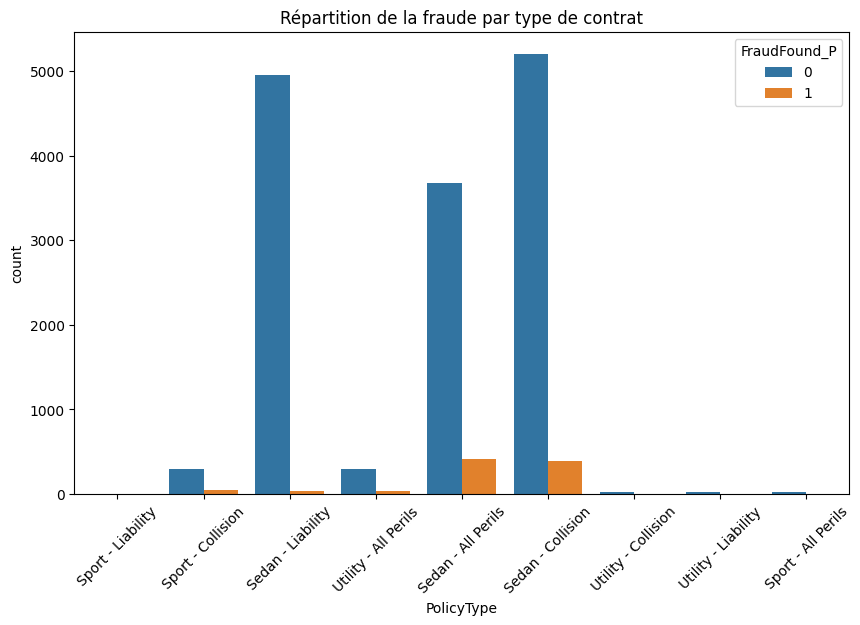

In [ ]:
# 4. Visualisation : Fraude par type de contrat
plt.figure(figsize=(10,6))
sns.countplot(x='PolicyType', hue='FraudFound_P', data=df)
plt.title('Répartition de la fraude par type de contrat')
plt.xticks(rotation=45)
plt.show()

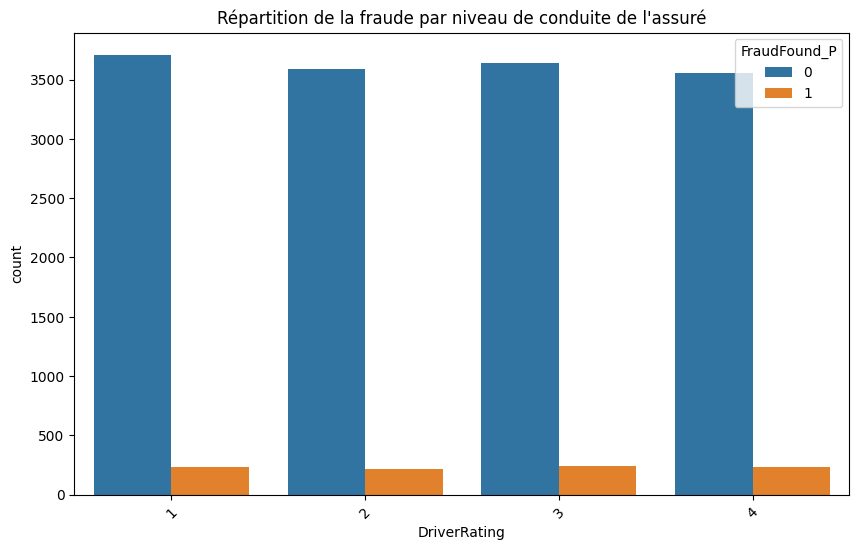

In [ ]:
# 4. Visualisation : Fraude par niveau de conduite de l'assuré
plt.figure(figsize=(10,6))
sns.countplot(x='DriverRating', hue='FraudFound_P', data=df)
plt.title("Répartition de la fraude par niveau de conduite de l'assuré")
plt.xticks(rotation=45)
plt.show()

## Data preprocessing

### Données manquantes

In [ ]:
detail_nas = pd.concat([df.dtypes,df.isnull().sum()],axis=1)
detail_nas.columns=['FORMAT','NB_NA']
detail_nas

,FORMAT,NB_NA
Month,object,0
WeekOfMonth,int64,0
DayOfWeek,object,0
Make,object,0
AccidentArea,object,0
DayOfWeekClaimed,object,0
MonthClaimed,object,0
WeekOfMonthClaimed,int64,0
Sex,object,0
MaritalStatus,object,0


Il n'y a aucune donnée manquante.

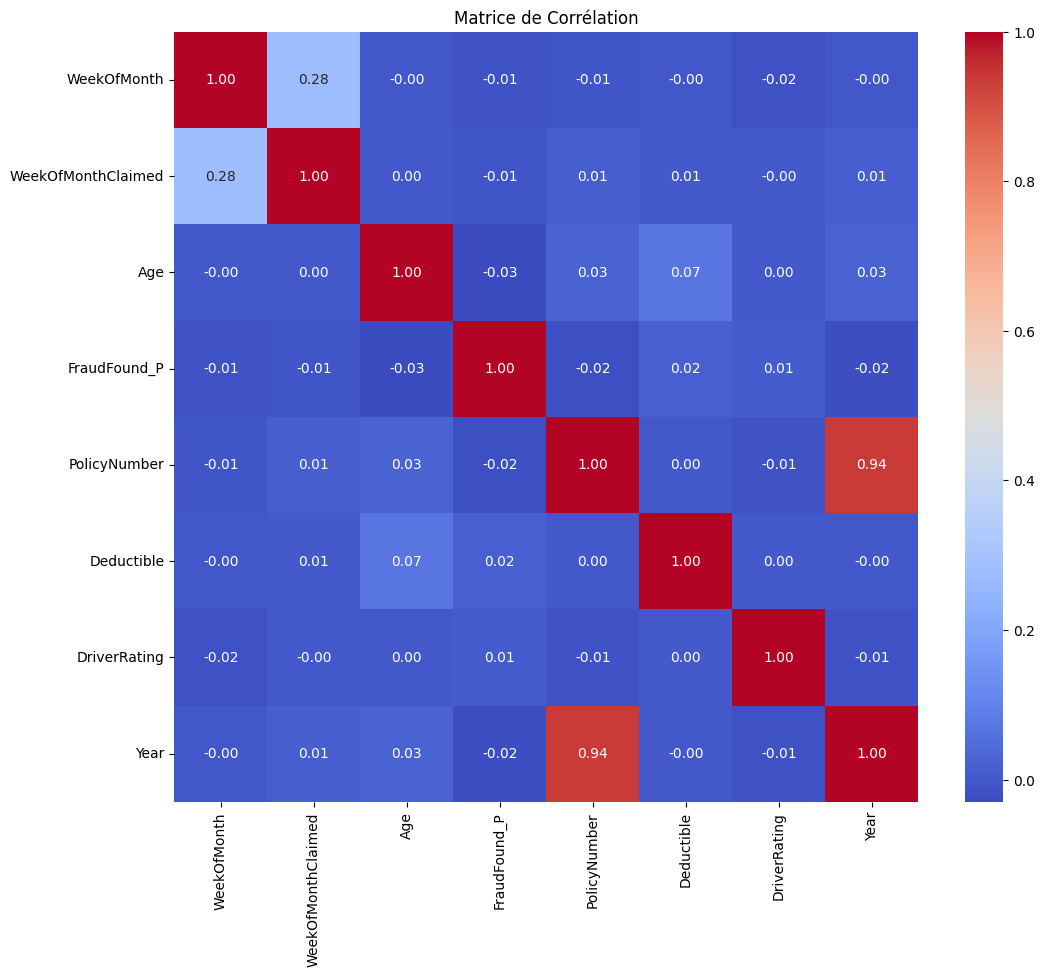

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True,fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

On voit qu'il y a une forte correlation entre la variable PolicyNumber et Year. On va supprimer la variable PolicyNumber pour ne gqrder que la variable Year.

In [ ]:

from scipy.stats.contingency import association

#Sélection des variables qualitatives (type 'object')

# On exclut la cible elle-même et les colonnes de type ID ou dates trop complexes
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cols_to_exclude = ['FraudFound_P']
variables_qualitatives = [col for col in cat_cols if col not in cols_to_exclude]

# Calcul du V de Cramer par rapport à 'fraud_reported'
resultats = []
for col in variables_qualitatives:
    # Création du tableau de contingence (croisement des fréquences)
    table = pd.crosstab(df[col], df['FraudFound_P'])

    # Utilisation de la fonction Scipy (Scipy version 1.7.0+)
    v_cramer = association(table, method="cramer")

    resultats.append({
        'Variable': col,
        'V de Cramer': round(v_cramer, 4)
    })

# 5. Création du tableau synthétique trié
tableau_v_cramer = pd.DataFrame(resultats).sort_values(by='V de Cramer', ascending=False)

# Affichage du tableau
print("Association des variables qualitatives avec la fraude (V de Cramer) :")
print(tableau_v_cramer.to_string(index=False))

Association des variables qualitatives avec la fraude (V de Cramer) :
            Variable  V de Cramer
          PolicyType       0.1684
          BasePolicy       0.1616
     VehicleCategory       0.1374
               Fault       0.1314
 AddressChange_Claim       0.0824
        VehiclePrice       0.0663
                Make       0.0623
  PastNumberOfClaims       0.0589
        MonthClaimed       0.0524
   AgeOfPolicyHolder       0.0463
               Month       0.0440
        AgeOfVehicle       0.0377
 NumberOfSuppliments       0.0343
        AccidentArea       0.0335
                 Sex       0.0300
           RepNumber       0.0277
Days_Policy_Accident       0.0274
           DayOfWeek       0.0257
           AgentType       0.0230
    DayOfWeekClaimed       0.0183
   Days_Policy_Claim       0.0178
   PoliceReportFiled       0.0160
        NumberOfCars       0.0125
       MaritalStatus       0.0081
      WitnessPresent       0.0081


On supprime les variables insignifiantes, en dessous de 0.03

In [ ]:
df = df.drop(columns=['WitnessPresent', 'MaritalStatus', 'PoliceReportFiled', 'NumberOfCars', 'Days_Policy_Claim','Days_Policy_Accident', 'AgentType', 'RepNumber', 'Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed','WeekOfMonthClaimed', 'PolicyNumber','Age'
                      ])

On supprime les dates car on a déjà les durées correpondantes.
On supprime le numéro de contrat, car il est unique et ne nous donnera aucune indication pour la prédiction.
On supprime la variable âge car une variable catgéorielle avec les tranches d'âge de l'assuré est déjà présente

### Encoding

In [ ]:

# 1. BINARY ENCODING


# Accident Area
df['AccidentArea'] = df['AccidentArea'].map({
    'Urban':0,
    'Rural':1
})

# Sex
df['Sex'] = df['Sex'].map({
    'Male':0,
    'Female':1
})

# Fault
df['Fault'] = df['Fault'].map({
    'Policy Holder':0,
    'Third Party':1
})



In [ ]:

# 2. ORDINAL ENCODING


# Past Number of Claims

claims_map = {
    'none':0,
    '1':1,
    '2 to 4':2,
    'more than 4':3
}

df['PastNumberOfClaims'] = df['PastNumberOfClaims'].str.lower().map(claims_map)

# Age of Vehicle

vehicle_age_map = {
'new':0,
'2 years':1,
'3 years':2,
'4 years':3,
'5 years':4,
'6 years':5,
'7 years':6,
'more than 7':7}

df['AgeOfVehicle'] = df['AgeOfVehicle'].str.lower().map(vehicle_age_map)

#age of policy holder
age_policyholder_map = {
'16 to 17':0,
'18 to 20':1,
'21 to 25':2,
'26 to 30':3,
'31 to 35':4,
'36 to 40':5,
'41 to 50':6,
'51 to 65':7,
'over 65':8
}

df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].str.lower().map(age_policyholder_map)

# Number of Supplements

supp_map = {
'none':0,
'1 to 2':1,
'3 to 5':2,
'more than 5':3
}

df['NumberOfSuppliments'] = df['NumberOfSuppliments'].str.lower().map(supp_map)

address_map = {
    'no change':0,
    'under 6 months':1,
    '1 year':2,
    '2 to 3 years':3,
    '4 to 8 years':4
}

df['AddressChange_Claim'] = df['AddressChange_Claim'].str.lower().map(address_map)


In [ ]:

# 3. ONE HOT ENCODING

one_hot_columns = [
'Make',
'PolicyType',
'VehicleCategory',
'VehiclePrice',
'BasePolicy'
]

df = pd.get_dummies(df,
                    columns=one_hot_columns,
                    drop_first=True)


print("Shape after encoding :", df.shape)
print(df.head())



Shape after encoding : (15420, 47)
   AccidentArea  Sex  Fault  FraudFound_P  Deductible  DriverRating  \
0             0    1      0             0         300             1   
1             0    0      0             0         400             4   
2             0    0      0             0         400             3   
3             1    0      1             0         400             2   
4             0    1      1             0         400             1   

   PastNumberOfClaims  AgeOfVehicle  AgeOfPolicyHolder  NumberOfSuppliments  \
0                   0             2                  3                    0   
1                   0             5                  4                    0   
2                   1             6                  6                    0   
3                   1             7                  7                    3   
4                   0             4                  4                    0   

   ...  PolicyType_Utility - Liability  VehicleCategory_Sport  

### Modèles de Deep Learning

Les données ont été découpées en 3 sets :
1. Train : 70 %
2. Validation : 15%
3. Test : 15%

Avec stratify pour palier au déséquilibre des classes.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Séparation X et y
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']


# 1ère séparation : Train / Temp


X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.30,     # 30% pour validation + test
    random_state=42,
    stratify=y          # important pour le déséquilibre
)

# 2ème séparation : Val / Test


X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,     # moitié-moitié
    random_state=42,
    stratify=y_temp
)


print("Train size :", X_train.shape)
print("Validation size :", X_val.shape)
print("Test size :", X_test.shape)

Train size : (10794, 46)
Validation size : (2313, 46)
Test size : (2313, 46)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Colonnes numériques à standardiser
num_cols = ['DriverRating','Deductible']

# Initialisation du scaler
scaler = StandardScaler()

# Fit seulement sur le train
scaler.fit(X_train[num_cols])

#transform
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


### Réseaux de neurones denses

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow import keras

import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]
lambda_l2 = 0.001

model_dense = models.Sequential([
    # Couche d'entrée : on commence avec un nombre de neurones proche de la dimension (128)
    layers.Dense(128, input_shape=(input_dim,),
                 kernel_initializer='he_normal',
                 kernel_regularizer=keras.regularizers.l2(l2=lambda_l2)),

    layers.Activation('relu'),
    layers.BatchNormalization(),
    # Dropout plus fort car beaucoup de colonnes = risque d'overfitting

    layers.Dense(64, kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(l2=lambda_l2)),
    layers.Activation('relu'),
    layers.BatchNormalization(),


    layers.Dense(32, kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(l2=lambda_l2)),
    layers.Activation('relu'),

    # Couche de sortie
    layers.Dense(1, activation='sigmoid')
])
opt = Adam(learning_rate=0.001)
model_dense.compile(optimizer=opt, loss='binary_crossentropy',
                    metrics=['accuracy', tf.keras.metrics.Recall(),
                             tf.keras.metrics.F1Score(name='f1_score', threshold=0.3)])
#reseaux de neurones
model_dense.summary()
history = model_dense.fit(X_train,
                          y_train,
                          epochs=50, batch_size=32,
                          validation_data= (X_val, y_val))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │         6,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8968 - f1_score: 0.0789 - loss: 0.6336 - recall_5: 0.0276 - val_accuracy: 0.0601 - val_f1_score: 0.1134 - val_loss: 29.3986 - val_recall_5: 1.0000
Epoch 2/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9380 - f1_score: 0.0899 - loss: 0.3878 - recall_5: 0.0038 - val_accuracy: 0.9399 - val_f1_score: 0.0000e+00 - val_loss: 3.0109 - val_recall_5: 0.0000e+00
Epoch 3/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9426 - f1_score: 0.1158 - loss: 0.3266 - recall_5: 0.0039 - val_accuracy: 0.9399 - val_f1_score: 0.0000e+00 - val_loss: 3.6243 - val_recall_5: 0.0000e+00
Epoch 4/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9410 - f1_score: 0.1599 - loss: 0.2985 - recall_5: 0.0057 - val_accuracy: 0.0601 - val_f1_score: 0.1134 - val_loss: 5.4303 - val_recall_5: 1.0000
Epoch 5/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9381 - f1_score: 0.1688 - loss: 0.2817 - recall_5: 0.0106 - val_accur

In [ ]:

historic = pd.DataFrame(history.history)
historic.head()

,accuracy,f1_score,loss,recall_5,val_accuracy,val_f1_score,val_loss,val_recall_5
0,0.930610,0.076118,0.507386,0.012384,0.060095,0.113377,29.398565,1.0
1,0.939133,0.103117,0.370901,0.012384,0.939905,0.000000,3.010921,0.0
2,0.939874,0.099346,0.322845,0.004644,0.939905,0.000000,3.624290,0.0
3,0.939503,0.123457,0.296606,0.004644,0.060095,0.113377,5.430300,1.0
4,0.940337,0.145320,0.272861,0.007740,0.939905,0.000000,4.201767,0.0


In [ ]:
# 4. Évaluation finale sur le set de test (données jamais vues)
print("\n--- Évaluation sur le set de test ---")
results = model_dense.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {results[0]:.4f}")
print(f"Accuracy: {results[1]:.4f}")
print(f"Recall (Rappel): {results[2]:.4f}")
print(f"F1-Score: {results[3]:.4f}")


--- Évaluation sur le set de test ---
Loss: 0.9291
Accuracy: 0.9403
Recall (Rappel): 0.0000
F1-Score: 0.0000


In [ ]:
def plot_learning_curves(history, figsize=(13, 6)):
    historic = pd.DataFrame(history.history)
    epochs = [epochs for epochs in range(1, historic.shape[0]+1)]

    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.plot(epochs, historic["loss"])
    plt.plot(epochs, historic["val_loss"], ls='--')
    plt.xlabel("Epoch")
    plt.ylim(bottom=0)
    plt.title("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(epochs, historic["recall_5"])
    plt.plot(epochs, historic["val_recall_5"], ls='--')
    plt.xlabel("Epoch")
    plt.ylim(0, 1)
    plt.title("Recall")

    plt.suptitle("Performances through training")
    plt.show()

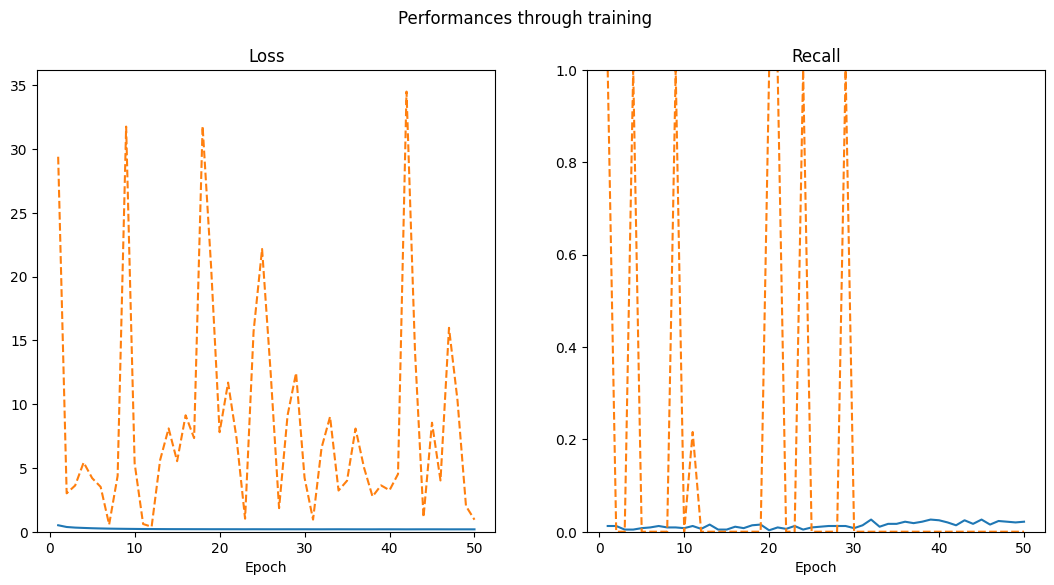

In [ ]:
plot_learning_curves(history, figsize=(13, 6))

# A supprimer
# Pas encore fait

In [ ]:
for col_name in df.columns:
    print(f"Variable : {col_name}")
    print(df[col_name].unique())
    print("-" * 20)

Variable : AccidentArea
[0 1]
--------------------
Variable : Sex
[1 0]
--------------------
Variable : Fault
[0 1]
--------------------
Variable : FraudFound_P
[0 1]
--------------------
Variable : Deductible
[300 400 500 700]
--------------------
Variable : DriverRating
[1 4 3 2]
--------------------
Variable : PastNumberOfClaims
[0 1 2 3]
--------------------
Variable : AgeOfVehicle
[2 5 6 7 4 0 3 1]
--------------------
Variable : AgeOfPolicyHolder
[3 4 6 7 2 5 0 8 1]
--------------------
Variable : NumberOfSuppliments
[0 3 2 1]
--------------------
Variable : AddressChange_Claim
[2 0 4 3 1]
--------------------
Variable : Year
[1994 1995 1996]
--------------------
Variable : Make_BMW
[False  True]
--------------------
Variable : Make_Chevrolet
[False  True]
--------------------
Variable : Make_Dodge
[False  True]
--------------------
Variable : Make_Ferrari
[False  True]
--------------------
Variable : Make_Ford
[False  True]
--------------------
Variable : Make_Honda
[ True False

Certaines variables ont pour modalités "none", il nous faut étudier sa signification.

In [ ]:
df = pd.DataFrame(df)

In [ ]:
lignes_Days_Policy_Claim_none = df.loc[df["Days_Policy_Claim"] == "none"].shape
print(lignes_Days_Policy_Claim_none)

lignes_Days_Policy_Accident_none = df.loc[df["Days_Policy_Accident"] == "none"].shape
print(lignes_Days_Policy_Accident_none)

lignes_NumberOfSuppliments_none = df.loc[df["NumberOfSuppliments"] == "none"].shape
print(lignes_NumberOfSuppliments_none)

lignes_PastNumberOfClaims_none = df.loc[df["PastNumberOfClaims"] == "none"].shape
print(lignes_PastNumberOfClaims_none)


KeyError: 'Days_Policy_Claim'

Pour les durées, cela représente une absence de données donc on supprime les lignes qui contienne un "none" car elles ne sont pas nombreuses par rapport à la taille du jeu de données

In [ ]:
df = df.loc[df["Days_Policy_Claim"] != "none"]
df = df.loc[df["Days_Policy_Accident"] != "none"]

In [ ]:
lignes_Days_Policy_Claim_none = df.loc[df["Days_Policy_Claim"] == "none"].shape
print(lignes_Days_Policy_Claim_none)

lignes_Days_Policy_Accident_none = df.loc[df["Days_Policy_Accident"] == "none"].shape
print(lignes_Days_Policy_Accident_none)

lignes_NumberOfSuppliments_none = df.loc[df["NumberOfSuppliments"] == "none"].shape
print(lignes_NumberOfSuppliments_none)

lignes_PastNumberOfClaims_none = df.loc[df["PastNumberOfClaims"] == "none"].shape
print(lignes_PastNumberOfClaims_none)

In [ ]:
df.shape

In [ ]:
Y = df.FraudFound_P
features = df.drop(columns=["FraudFound_P"])

In [ ]:
variables_numeriques = []
variables_categorielles = []
for colu in features.columns:
    print(colu)
    if str(features[colu].dtypes) in ["int32","int64","float64"]:
        if len(features[colu].unique())==2 :
            variables_categorielles.append(features[colu])
            print("=> Variable binaire")
        else :
            variables_numeriques.append(features[colu])
            print("=> Variable numérique")
    else :
        variables_categorielles.append(features[colu])
        print("=> Variable catégorielle")

In [ ]:
variables_numeriques = pd.DataFrame(variables_numeriques).transpose()
variables_categorielles = pd.DataFrame(variables_categorielles).transpose()

One hot encoding et standardisation

In [ ]:
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack

X_train_num, X_test_num, X_train_cat, X_test_cat, y_train, y_test = train_test_split(variables_numeriques, variables_categorielles, Y, random_state=10, train_size=0.8)

preproc_norm = preproc.Normalizer(norm='l2')
preproc_norm = preproc_norm.fit(X_train_num)
X_train_norm = preproc_norm.transform(X_train_num)
X_test_norm = preproc_norm.transform(X_test_num)

global_columns = variables_numeriques.columns.to_list()

preproc_ohe = preproc.OneHotEncoder(handle_unknown='ignore')
preproc_ohe = preproc_ohe.fit(X_train_cat)
X_train_ohe = preproc_ohe.transform(X_train_cat)
X_test_ohe = preproc_ohe.transform(X_test_cat)

X_train_global = hstack((X_train_norm,X_train_ohe))
X_test_global = hstack((X_test_norm,X_test_ohe))